# WORK-IN-PROGRESS. DO NOT JUDGE.

Analysis is based on nifty50 index from 14 Oct 2016 to 13 Oct 2017

In [113]:
#import necesary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import calendar

In [135]:
#load in the data and see what is looks like

data = pd.read_csv('./data/nifty50.csv', index_col=0, parse_dates=True)
data.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
Date,,,,,,
2016-10-14,8594.00,8604.45,8549.80,8583.4,167848947,9613.47
2016-10-17,8612.95,8615.40,8506.15,8520.4,203516577,8590.35
2016-10-18,8556.05,8685.10,8555.90,8677.9,216626083,9162.11
2016-10-19,8697.50,8698.75,8636.70,8659.1,177397872,7790.01
2016-10-20,8693.35,8727.00,8678.30,8699.4,165952091,7120.32


In [136]:
#create a new column with the day of the week

data['dayofweek'] = data.index.weekday_name
data.head()

,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr),dayofweek
Date,,,,,,,
2016-10-14,8594.00,8604.45,8549.80,8583.4,167848947,9613.47,Friday
2016-10-17,8612.95,8615.40,8506.15,8520.4,203516577,8590.35,Monday
2016-10-18,8556.05,8685.10,8555.90,8677.9,216626083,9162.11,Tuesday
2016-10-19,8697.50,8698.75,8636.70,8659.1,177397872,7790.01,Wednesday
2016-10-20,8693.35,8727.00,8678.30,8699.4,165952091,7120.32,Thursday


In [137]:
data.dayofweek.value_counts()

Wednesday    52
Thursday     51
Friday       50
Tuesday      50
Monday       46
Sunday        1
Name: dayofweek, dtype: int64

In [138]:
#Let's remove the one entry for Sunday. Check if it's the diwali/muhurat trading day
data.drop(data[data.dayofweek == 'Sunday'].index, inplace=True)

(8600, 9300)

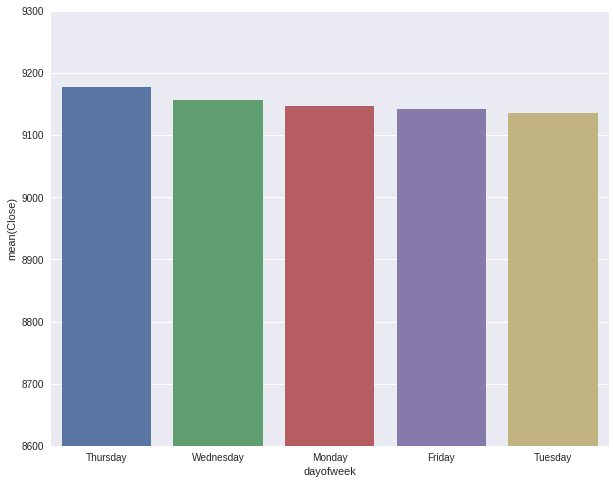

In [139]:
# Mean close day-wise
avg_by_day = data.groupby('dayofweek', as_index=False).mean()
avg_by_day.sort_values('Close', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.barplot(data=avg_by_day, x='dayofweek', y='Close')
plt.ylim((8600, 9300))

(8600, 9300)

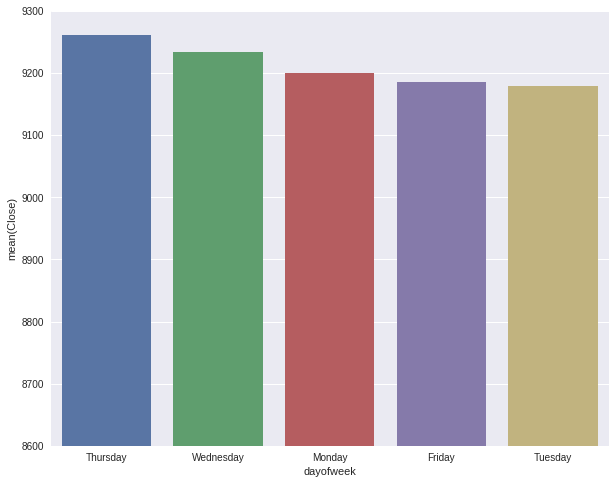

In [141]:
# Median close day-wise
avg_by_day = data.groupby('dayofweek', as_index=False).median()
avg_by_day.sort_values('Close', ascending=False, inplace=True)

plt.figure(figsize=(10, 8))
sns.barplot(data=avg_by_day, x='dayofweek', y='Close')
plt.ylim((8600, 9300))

Thursday ko nifty high pe close ho raha hai. Does it have anything to do with options trading?

**Let's check the variance of the closing prices for every day of the week.**